In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

Data_Mouse_Drug=pd.read_csv(mouse_drug_data_to_load)

Data_Clinical_trial=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

Mouse_ID_Data = pd.merge(Data_Clinical_trial,Data_Mouse_Drug, on="Mouse ID")

# Display the data table for preview

Mouse_ID_Data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

Group_Tumor_Volume = Mouse_ID_Data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

Mean_Tumor_Volume=pd.DataFrame(Group_Tumor_Volume).reset_index()

# Preview DataFrame

Mean_Tumor_Volume.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

Standard_Error_Group = Mouse_ID_Data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame

Standard_Error_Frame=pd.DataFrame(Standard_Error_Group).reset_index()

# Preview DataFrame

Standard_Error_Frame.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

ReFormating_Data=Mean_Tumor_Volume.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

StandError=Standard_Error_Frame.pivot(index="Timepoint", columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked

ReFormating_Data.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


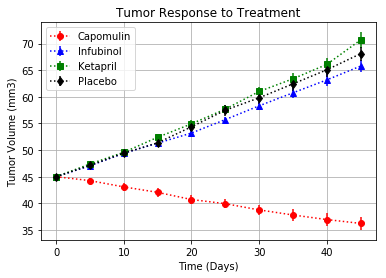

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate the Plot (with Error Bars)

Drugs_List= ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
Format_Style = {"Capomulin":'ro:', 'Infubinol':'b^:', 'Ketapril':'gs:', 'Placebo': 'kd:'}

fig1, ax1 = plt.subplots()
for drug in Drugs_List:
    ax1.errorbar(ReFormating_Data.index, ReFormating_Data[drug], StandError[drug], fmt = Format_Style[drug])

    
ax1.legend()
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')

#Save plot 
plt.savefig("Tumor_Response_to_Treatment.png")
plt.show()
# Save the Figure


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Group_Tumor_Volume_Met = Mouse_ID_Data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame

Mean_Metastatic=pd.DataFrame(Group_Tumor_Volume_Met).reset_index()

# Preview DataFrame

Mean_Metastatic.head()



,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Group_Tumor_Volume_Met_Std_Err = Mouse_ID_Data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame

Metastatic_Standar_Error=pd.DataFrame(Group_Tumor_Volume_Met_Std_Err).reset_index()

# Preview DataFrame

Metastatic_Standar_Error.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
ReFormating_Data_Met=Mean_Metastatic.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

StandError_Met=Metastatic_Standar_Error.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked

ReFormating_Data_Met.head(10)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


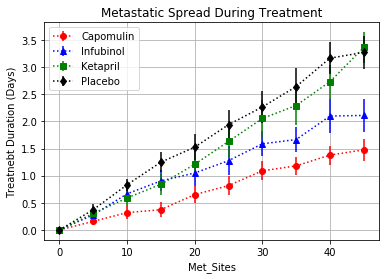

In [17]:
# Generate the Plot (with Error Bars)

fig2, ax2 = plt.subplots()
for drug in Drugs_List:
    ax2.errorbar(ReFormating_Data_Met.index, ReFormating_Data_Met[drug], StandError_Met[drug], fmt = Format_Style[drug])

    
ax2.legend()
plt.grid(True)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Met_Sites')
plt.ylabel('Treatnebt Duration (Days)')

#Save plot 
plt.savefig("Metastatic_Spread_During_Treatment.png")
plt.show()
# Save the Figure


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

Mouse_Count = Mouse_ID_Data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
Mouse_Count_Frame=pd.DataFrame({"Mouse Count":Mouse_Count}).reset_index()

# Preview DataFrame
Mouse_Count_Frame.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
Mouse_Count_Total1= Mouse_Count_Frame.groupby(["Drug"])["Mouse Count"].max()

Mouse_Percentage_T= (Mouse_Count * 100) / Mouse_Count_Total1

Mouse_Percentage_Frame=pd.DataFrame({"Mouse Count":Mouse_Count, "% Mouse Count": Mouse_Percentage_T}).reset_index()


In [12]:
# Minor Data Munging to Re-Format the Data Frames

ReFormat_Count_Mouse= Mouse_Percentage_Frame.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

ReFormat_Count_Mouse_P= Mouse_Percentage_Frame.pivot(index="Timepoint", columns="Drug", values="% Mouse Count")

# Preview the Data Frame
ReFormat_Count_Mouse_P.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


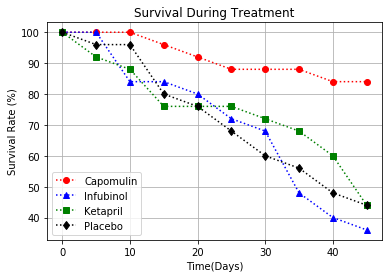

In [13]:
# Generate the Plot (Accounting for percentages)

fig3, ax3 = plt.subplots()

for drug in Drugs_List:
    plt.plot(ReFormat_Count_Mouse_P.index, ReFormat_Count_Mouse_P[drug], Format_Style[drug])
        
plt.grid(True)
ax3.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig("Survival During Treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

Tumor_Start = ReFormating_Data.iloc[0,:]
Tumor_Ends = ReFormating_Data.iloc[9,:]

Tumor_Variance= ((Tumor_Ends / Tumor_Start) -1)*100

Tumor_Variance

# Display the data to confirm





            

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
Tumor_Variance_Frame=pd.DataFrame({"Variance": Tumor_Variance})

Tumor_Variance_Frame["Pass"] = (Tumor_Variance_Frame<0)

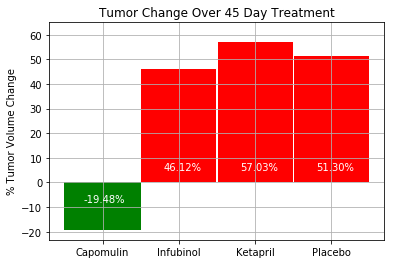

<Figure size 432x288 with 0 Axes>

In [16]:
# Store all Relevant Percent Changes into a Tuple

fig4, ax4 = plt.subplots()
x = 0


for drug in Drugs_List:
    y = Tumor_Variance_Frame.loc[drug, "Variance"]
    if Tumor_Variance_Frame.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .999, color = "g")
        plt.text(x-.25, -8, '{:.2f}%'.format(y), color = "w")
    else:
        ax4.bar(drug, y, width = .981, color = "r")
        plt.text(x-.2, 5, '{:.2f}%'.format(y), color = "w")
    x = 1 + x

plt.grid(True)
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.ylim(ymax = 65)
#Save plot 
plt.savefig("Mean_Tumor_Change.png")
plt.show()
# Save the Figure




## Description

    * The most efective drug is Capomuli between the four drugs we analyse.
    * Capomuli drug reduced the tumor 19.48% inside the period time.
    * The error within the Capomuli drug is less than the others, so when it gets tested in other samples the probability of having the same results will be high
    * The 84% of the mouses survived the treatment with Capomuli drug inside the 45 days period.